In [1]:
import sys
import shutil
sys.path.append("../")

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs import LimitPlot
from astropy.cosmology import Planck15
import corner

%matplotlib inline
%load_ext autoreload
%autoreload 2

catalog = pd.read_csv("/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv")

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Plot limit with and without 8 - looks the same???

In [2]:
work_dir = '/tigress/bsafdi/github/NPTF-working/NPTF-ID-Catalog/runs_sid/notebooks/LimitPlot//'
plots_dir = '/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots/'
data_dir = work_dir + 'data/'

data_file_names =[ data_dir + f for f in ['stath_max-lim.dat','stath_min-lim.dat','statp_q16-lim.dat','statp_q84-lim.dat',
                  'Jcm_q16-lim.dat','Jcm_q84-lim.dat','GCE.dat','FermiDwarf.dat','nominal-data.dat','gce-abazajian.dat',
                                         'gce-calore.dat','gce-gordon.dat','thermal-relic.dat'  ] ]

data_files = [np.loadtxt(f) for f in data_file_names]

#####thermal
thermal = 10**data_files[12]

In [3]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        skip_halos=[0])

base_lim, _, maxTS_ary = plot_data.return_limits()

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [4]:
plot_data = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/Tully//',
                        elephant=False, 
                        nmc=1,
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        halos_ran=1000, 
                        halos_to_keep=1000,
                        data_type="data",
                        catalog_file="/tigress/nrodd/DM-Catalog-Scan/DataFiles/Catalogs/2MRSLocalTully_ALL_DATAPAPER_Planck15_v7.csv",
                        file_prefix='LL2_TSmx_lim_b_emin4_o',
                        skip_halos=[0,8])

no_obj8, _, maxTS_ary = plot_data.return_limits()

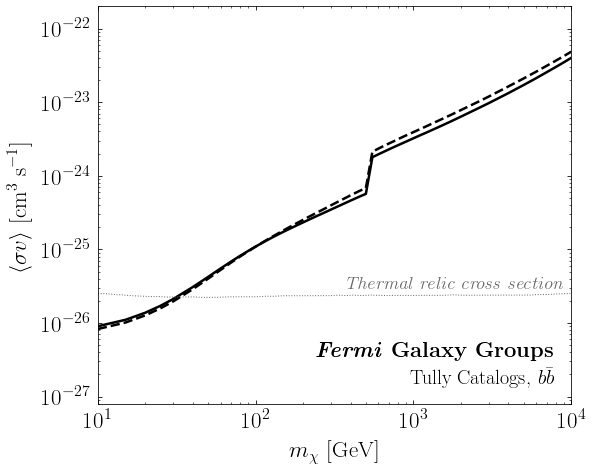

In [5]:
plot_h = 10/1.2
plot_w = 8/1.2

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))

fudge = 1.02

plt.plot(plot_data.marr,10**np.percentile(base_lim[-1], 2.5, axis=1), alpha=1, color='k',label=r'Galaxy groups (this work)',lw=2.5)
plt.plot(plot_data.marr,10**np.percentile(no_obj8[-1], 2.5, axis=1), alpha=1, color='k',ls='--',label=r'Galaxy groups (no boost)',lw=2.5)

plt.plot(thermal[::,0],thermal[::,1],linestyle='dotted',color='dimgrey',linewidth=1)

# handles,labels = ax.get_legend_handles_labels()
# handles = [handles[0],handles[4], handles[3],handles[1],handles[2]] #, handles[2]]
# labels = [labels[0], handles[1],labels[4],labels[3],labels[2]] #, labels[2]]

# labels = [u'Galaxy groups (this work)',
#  u'95\\% containment',
#  u'68\\% containment',
#           u'Galaxy groups, no boost',
#  u'$\\mathit{Fermi}$ dwarfs (2016)']

# leg = plt.legend(handles,labels,loc=2,fontsize=17,fancybox=True,facecolor='none',frameon=False)

plt.xscale('log')
plt.yscale('log')
plt.xticks(fontsize=23);
plt.yticks(fontsize=23);
plt.xlabel(r"$m_\chi$ [GeV]",fontsize=23)
plt.ylabel(r"$\langle \sigma v \rangle$ [cm$^3$ s$^{-1}$]",fontsize=23)

plt.xlim([1e1,1e4])
plt.ylim([8e-28,2e-22])

plt.text(240.3, 3.5e-27, r'\textbf{\emph{Fermi} Galaxy Groups}',fontsize=22,color='black')
plt.text(950.3, 1.5e-27, r'Tully Catalogs, $b\bar b$',fontsize=20,color='black')
plt.text(380, 3.e-26, r'\emph{Thermal relic cross section}',fontsize=19.,color='dimgrey')

plt.tight_layout()

#plt.savefig(plots_dir + 'dwarfs_ecut4.pdf',bbox_inches='tight')

# Sky map

In [6]:
# Get location

l, b = catalog['l'].values[8], catalog['b'].values[8]
print l, b

phi = l*np.pi/180.
theta = np.pi/2 - b*np.pi/180.

print phi, theta

236.6231 -53.8838
4.12985218128 2.51124605028


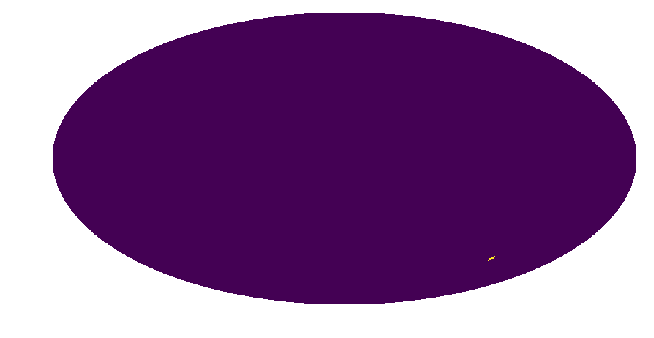

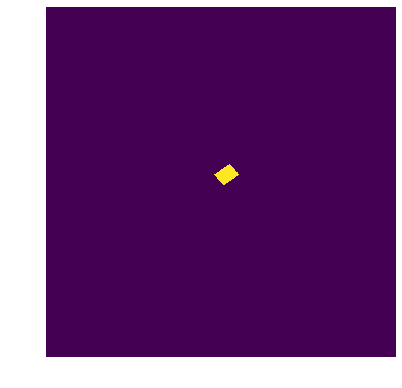

In [7]:
# Test I can convert to carview lonra correctly
nside=32
testmap = np.zeros(hp.nside2npix(nside))
pix = hp.ang2pix(nside,theta,phi)
testmap[pix] = 1
hp.mollview(testmap,title='',cbar=False)

lonval = ((l + 180.) % 360.) - 180.

hp.cartview(testmap,lonra=[lonval-25,lonval+25],latra=[b-25,b+25],title='',flip='astro',cbar=False)

In [8]:
# Load fermi plugin and data
from local_dirs import *
sys.path.append(nptf_old_dir)
import fermi.fermi_plugin as fp

maps_dir='/tigress/smsharma/public/CTBCORE/'
fermi_data_dir='/tigress/smsharma/public/FermiData/'
work_dir = '/tigress/nrodd/DM-Catalog-Scan/'
f_global = fp.fermi_plugin(maps_dir, fermi_data_dir=fermi_data_dir, work_dir=work_dir, 
                           CTB_en_min=0, CTB_en_max=40, nside=128, eventclass=5, 
                           eventtype=0, newstyle=1, data_July16=True)

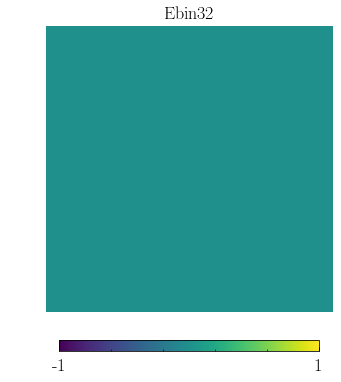

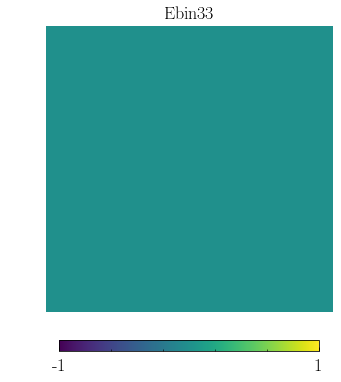

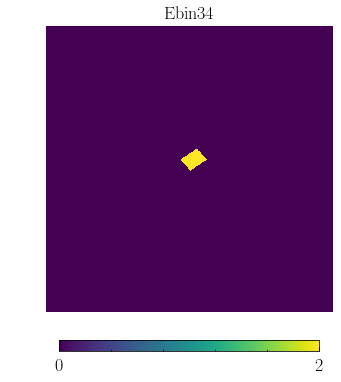

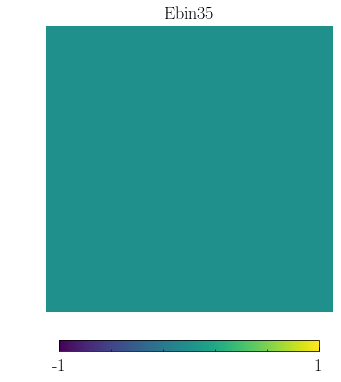

In [9]:
for ebin in range(32,36):
    data = f_global.CTB_count_maps[ebin]
    hp.cartview(data,lonra=[lonval-5,lonval+5],latra=[b-5,b+5],title='Ebin'+str(ebin),flip='astro',min=0)

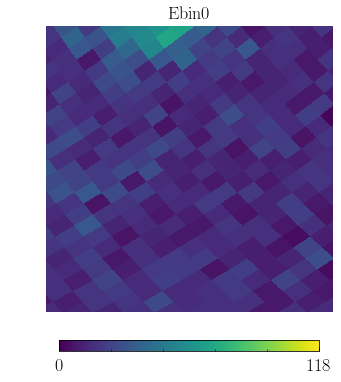

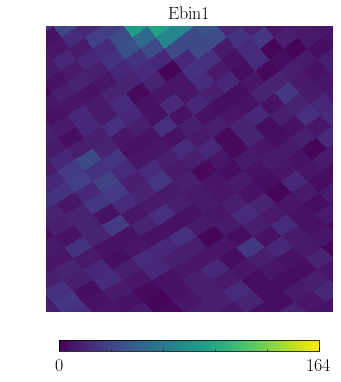

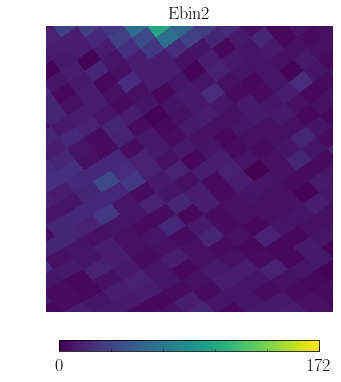

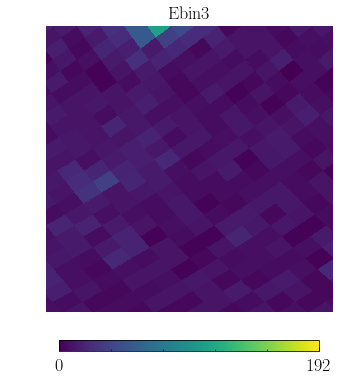

In [10]:
for ebin in range(0,4):
    data = f_global.CTB_count_maps[ebin]
    hp.cartview(data,lonra=[lonval-5,lonval+5],latra=[b-5,b+5],title='Ebin'+str(ebin),flip='astro',min=0)